<a href="https://colab.research.google.com/github/KrishnaChaitanya07/AIML/blob/main/AI_Intern_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
#SECTION A: Python & Data Manipulation
#Q1. Data Cleanup & Summary

import pandas as pd
import numpy as np
import os

data = {
    'Name': ['Akhil', 'Bobby', 'Cherry', 'Divya', 'Eswar'],
    'Math': [85, 78, 96, 92, 88],
    'Science': [90, 56, 78, 85, 80],
    'English': [88, 76, 90, 77, 84],
    'Gender': ['F', 'M', 'M', 'F', 'M']
}
df_students = pd.DataFrame(data)
student_csv_path = os.path.join(solution_dir, "student_scores.csv")
df_students.to_csv(student_csv_path, index=False)

def clean_and_summarize_scores(csv_path):
    df = pd.read_csv(csv_path)

    for col in ['Math', 'Science', 'English']:
        df[col].fillna(df[col].mean(), inplace=True)
    df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})

    summary = df.groupby('Gender')[['Math', 'Science', 'English']].mean().reset_index()
    return df, summary

cleaned_df, summary_df = clean_and_summarize_scores(student_csv_path)

cleaned_path = os.path.join(solution_dir, "Q1_cleaned_data.csv")
summary_path = os.path.join(solution_dir, "Q1_summary_by_gender.csv")
cleaned_df.to_csv(cleaned_path, index=False)
summary_df.to_csv(summary_path, index=False)

(cleaned_df, summary_df)


<ipython-input-42-8eff03090489>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


(     Name  Math  Science  English  Gender
 0   Akhil    85       90       88       0
 1   Bobby    78       56       76       1
 2  Cherry    96       78       90       1
 3   Divya    92       85       77       0
 4   Eswar    88       80       84       1,
    Gender       Math    Science    English
 0       0  88.500000  87.500000  82.500000
 1       1  87.333333  71.333333  83.333333)

In [31]:
# Q2:Dictionary-Based Stats

user_scores = {
    "user_1": [80, 90, 85],
    "user_2": [60, 65, 70],
    "user_3": [75, 85, 80]
}

def user_stats(score_dict):
    result = {}
    for user, scores in score_dict.items():
        result[user] = {
            "average": sum(scores)/len(scores),
            "min": min(scores),
            "max": max(scores)
        }
    return result

q2_result = user_stats(user_scores)

q2_output_path = os.path.join(solution_dir, "Q2_user_statistics.csv")
df_q2 = pd.DataFrame(q2_result).T.reset_index().rename(columns={'index': 'user'})
df_q2.to_csv(q2_output_path, index=False)

df_q2


,user,average,min,max
0,user_1,85.0,80.0,90.0
1,user_2,65.0,60.0,70.0
2,user_3,80.0,75.0,85.0


Accuracy: 1.0


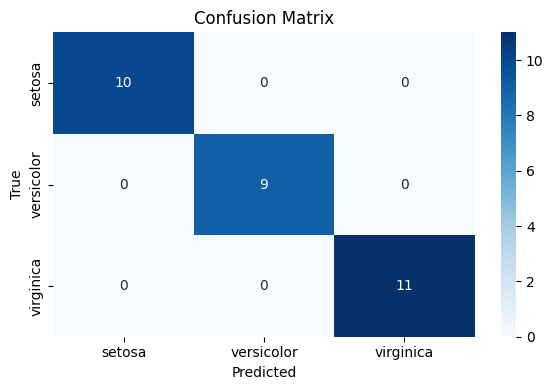

(1.0,
 array([[10,  0,  0],
        [ 0,  9,  0],
        [ 0,  0, 11]]))

In [43]:
#SECTION B: Machine Learning

# Q3: Classifier on Iris Dataset

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig("/mnt/data/Q3_confusion_matrix.png")
plt.show()

accuracy, conf_mat



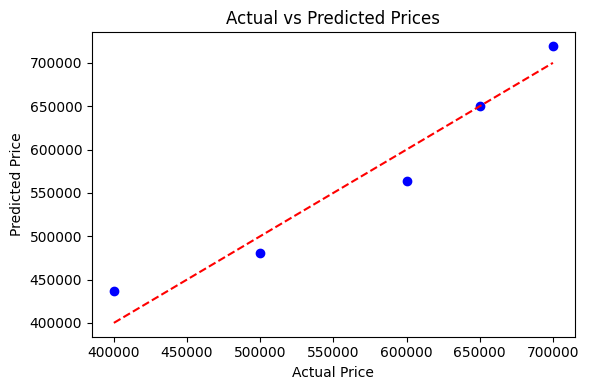

(22538.840469874965,
 array([436851.07995453, 480276.61993179, 563376.27889352, 650227.35884805,
        719268.66237211]))

In [44]:
# Q4: Simple Linear Regression

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'area': [1500, 1800, 2400, 3000, 3500],
    'bedrooms': [3, 4, 3, 5, 4],
    'price': [400000, 500000, 600000, 650000, 700000]
})

X = data[['area', 'bedrooms']]
y = data['price']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

mae = mean_absolute_error(y, y_pred)

plt.figure(figsize=(6, 4))
plt.scatter(y, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.tight_layout()
plt.savefig("/mnt/data/Q4_actual_vs_predicted.png")
plt.show()

mae, y_pred



In [40]:
#SECTION C
#Q5 Conceptual

#1.In machine learning, what is overfitting?
print("A model performs poorly on unseen data when it overfits, which happens when \
it learns both the noise and the underlying patterns in the training set.")

#2.In what situations would you choose a decision tree over logistic regression?
print("When you need a model that can capture non-linear relationships and is simple \
to understand without feature scaling, a decision tree is the best option.")

#3.Describe the train-test split and its significance.
print("Train-test splitting separates the dataset into distinct training and testing \
sets in order to assess a model's ability to generalise to new, untested data.")

#4.What does normalisation aim to achieve?
print("Many machine learning algorithms perform better and converge more quickly when\
      numeric features are scaled to a similar range through normalisation.")

#5.What distinguishes regression from classification?
print("Regression predicts continuous numerical values, whereas classification \
 predicts discrete labels or categories.")

A model performs poorly on unseen data when it overfits, which happens when it learns both the noise and the underlying patterns in the training set.
When you need a model that can capture non-linear relationships and is simple to understand without feature scaling, a decision tree is the best option.
Train-test splitting separates the dataset into distinct training and testing sets in order to assess a model's ability to generalise to new, untested data.
Many machine learning algorithms perform better and converge more quickly when      numeric features are scaled to a similar range through normalisation.
Regression predicts continuous numerical values, whereas classification  predicts discrete labels or categories.


In [46]:
#Q6. Simple NLP Task – Sentiment Classification


from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

categories = ['rec.autos', 'comp.sys.mac.hardware']
newsgroups = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

model = LogisticRegression(max_iter=1000)
model.fit(X, y)

y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

feature_names = np.array(vectorizer.get_feature_names_out())
coeffs = model.coef_[0]
top_5_mac = feature_names[np.argsort(coeffs)[-5:]]
top_5_autos = feature_names[np.argsort(coeffs)[:5]]

print("Top 5 words for 'comp.sys.mac.hardware':", top_5_mac[::-1])
print("Top 5 words for 'rec.autos':", top_5_autos[::-1])


Accuracy: 0.9744027303754266
Top 5 words for 'comp.sys.mac.hardware': ['car' 'cars' 'oil' 'engine' 'ford']
Top 5 words for 'rec.autos': ['card' 'scsi' 'monitor' 'apple' 'mac']
